In [1]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in uWF data, downloaded from watertofood.org 
path = "/home/jburdano/code/Techlab/virtualwater/"
fil =  "New_1960-2016.csv" #"watertofood_data_21crops_11countries_1960-2016.csv" 
df = pd.read_csv(path+fil, ";",header=1)
df = df.mask(df==0)    # set zero values to nan-values
df.head(5)

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,1961,1962,1963,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,67.596703,67.490303,67.621696,...,155.539001,173.072998,176.309998,145.723999,160.794998,302.752991,177.143005,157.955994,132.710007,251.289993
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,1601.750000,1525.469971,1690.540039,...,1422.300049,1414.449951,1329.170044,1745.650024,1409.689941,1252.089966,1606.729980,1680.609985,1756.510010,2152.719971
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,148.216995,146.811996,135.082001,...,95.588402,88.136299,87.707802,90.581497,75.778297,80.972298,84.542801,77.037201,116.822998,88.053802
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,562.728027,415.609985,617.362000,...,589.810974,746.117981,660.210022,685.169006,689.297974,697.112000,694.752014,692.406006,690.057007,687.744019
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,209.169998,211.339005,185.434998,...,47.731300,41.110500,39.060101,46.044498,43.460999,42.093102,40.094002,40.202702,46.184299,49.357101


In [3]:
# bring df in format useable with sns
dftest = pd.pivot_table(df, values=df.iloc[:,7:], index=None, columns=["Item Name","Country Name"])#.xs("1961")
dftest.index.name = "Years"
dfpl = pd.DataFrame(dftest.stack(level=0).stack(level=0))
dfpl.reset_index(level=[0,1,2],inplace=True)
dfpl.columns = ['Years', 'Item Name', 'Country Name', 'uWF']
dfpl["Years"]=dfpl["Years"].astype(int)
display(dfpl.shape)
dfpl.head(5)

(10598, 4)

,Years,Item Name,Country Name,uWF
0,1961,Apples,Austria,67.596703
1,1961,Apples,France,314.213013
2,1961,Apples,Germany,147.557999
3,1961,Apples,Greece,1032.219971
4,1961,Apples,Hungary,793.695984


## Data cleaning --> set unrealistic values to NaN

In [14]:
print(dfpl["uWF"].isna().sum())
dfpl.loc[dfpl["uWF"]>5000,"uWF"] = np.nan  #exclude values larger than 5k l/kg from plot
print(dfpl["uWF"].isna().sum())

0
107


In [53]:
dfpl.loc[:,"Years"] = dfpl.loc[:,"Years"].astype("int")
dfpl.dtypes

Years             int64
Item Name        object
Country Name     object
uWF             float64
dtype: object

## Start Plotting: Histogram-like panel plot

In [51]:
sns.set_theme(context='talk', style='dark', font='sans-serif', 
              font_scale=.8, color_codes=True, rc=None)
pal = sns.color_palette("viridis", len(dfpl["Years"].unique()))


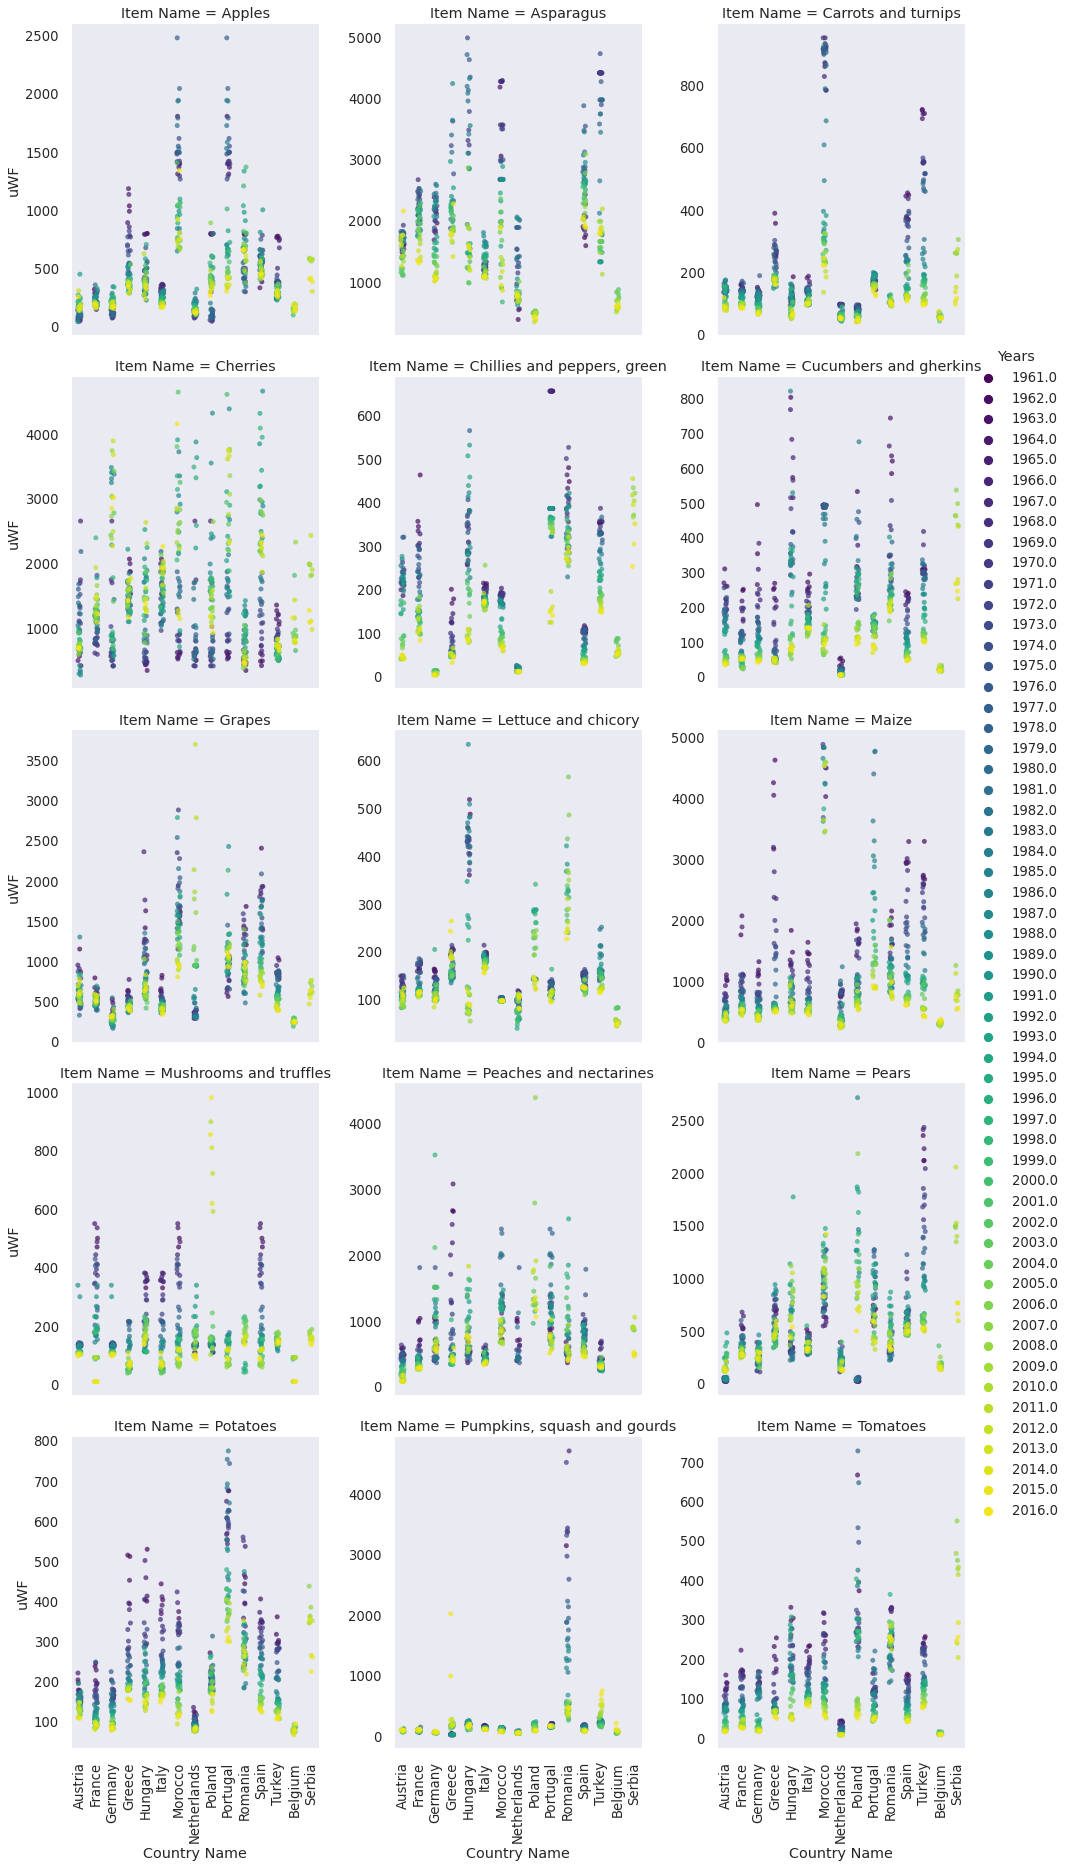

In [52]:
g = sns.catplot(x="Country Name", y="uWF", hue="Years",
            col="Item Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=dfpl, alpha = .7, palette=pal); #, palette=pal
g.set_xticklabels(rotation=90);

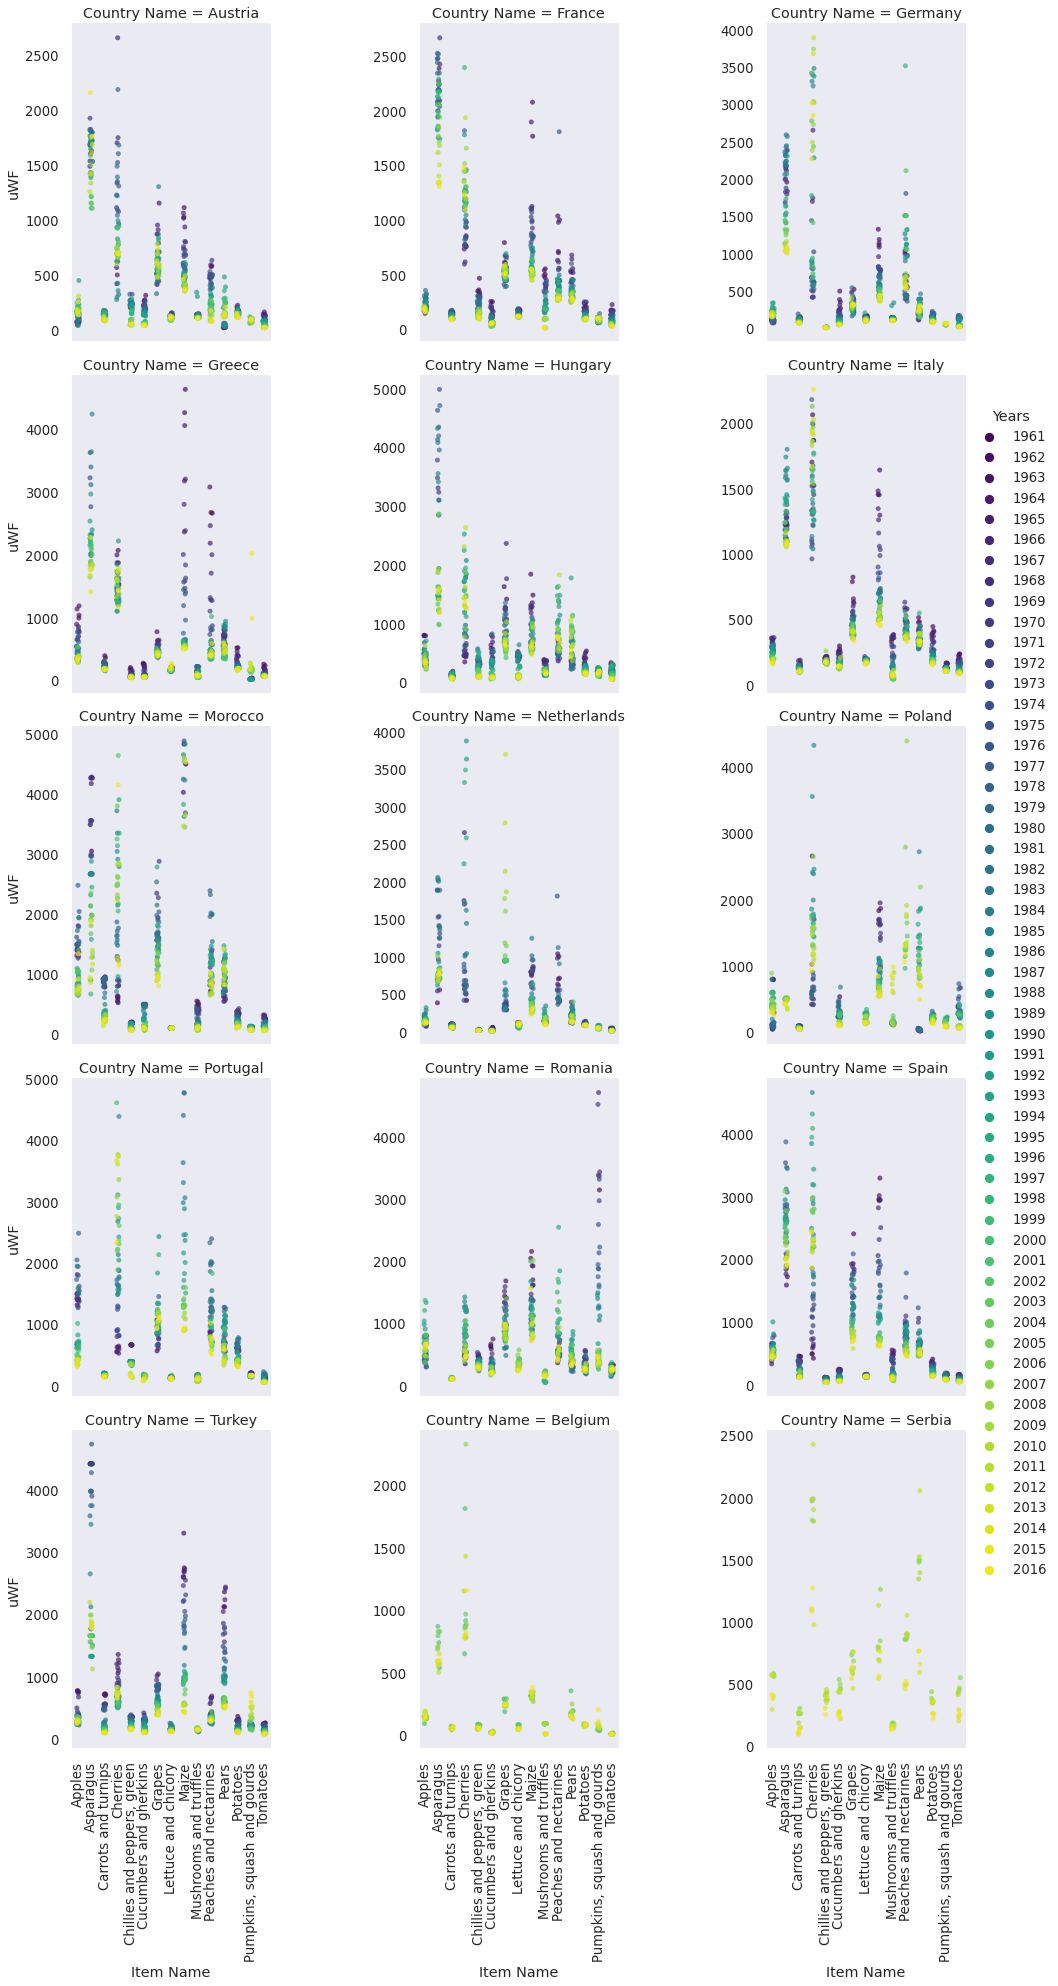

In [54]:
g = sns.catplot(x="Item Name", y="uWF", hue="Years",
            col="Country Name", col_wrap=3, aspect=.9, sharey=False,
            kind="strip", data=dfpl, palette=pal, alpha = .68);
g.set_xticklabels(rotation=90);

In [18]:
dfpl.dtypes

Years             int64
Item Name        object
Country Name     object
uWF             float64
dtype: object

In [5]:
# g = sns.FacetGrid(dfpl, col="Item Name", sharey=False, hue="Country Name",
#                   col_wrap=5, height=5, )
# g.map(sns.violinplot, "Country Name","uWF", order=dfpl["Country Name"])
# g.set(xticks=[0, 1000, 2000],xlim=[0,2000])
# g.add_legend();